# 完成　振幅の理論式

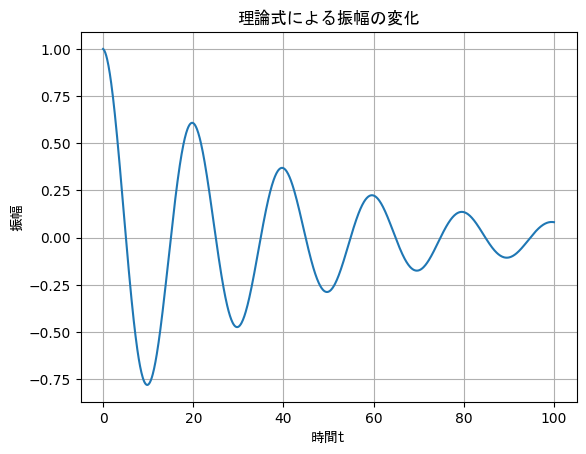

In [1]:
# 完成　振幅の理論式（解析解）
import matplotlib.pyplot as plt
import numpy as np

m = 10
damping = 0.5
k = 1
shita = 0
# 初期条件
x0 = 1  # 初期変位
v0 = 0  # 初速度

# 関数の定義
def f(t):
    omega = np.sqrt(k/m - (damping/(2*m))**2)
    return np.exp(-damping/(2*m)*t) * (x0 * np.cos(omega*t) + (v0 + damping/(2*m)*x0) * np.sin(omega*t))

# xの値の範囲を指定
x = np.linspace(0, 100, 1000)
y= f(x)
# グラフの描画
plt.plot(x, y)
plt.title("理論式による振幅の変化", fontname="MS Gothic")
plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("振幅", fontname="MS Gothic")
plt.grid(True)
# plt.legend(prop={'family':'MS Gothic'})
plt.show()




# plt.grid()
# plt.title("z座標の変化", fontname="MS Gothic")
# plt.plot(times, cube1_zpos, linestyle='solid', marker='s', label="下のブロックのZ座標")
# plt.plot(times, cube2_zpos, linestyle='solid', marker='p', label="上のブロックのZ座標")
# plt.plot(times, cube2_greenball_zpos, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ座標")
# # plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
# plt.legend(prop={'family':'MS Gothic'})
# plt.show()


# 完成　MuJoCoの減衰振動ログとり

""

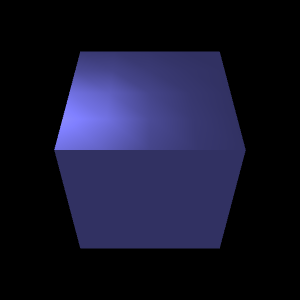

100%|██████████| 1000000/1000000 [00:07<00:00, 138500.33it/s]


最後の速度qvel= [-0.00280349]
最後の時間 100.00000000219612


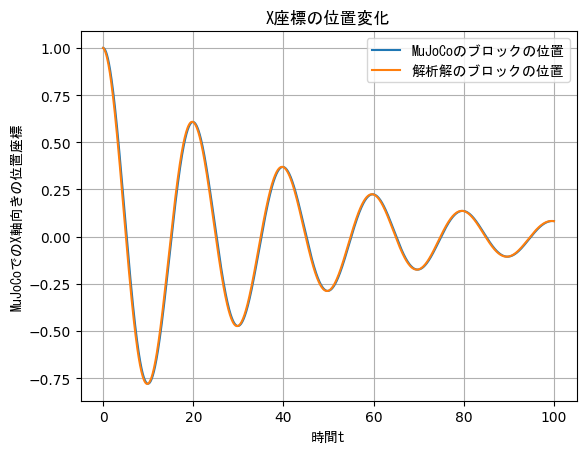

In [2]:
# 完成　MuJoCoの減衰振動ログとり＆解析解と重ね合わせ
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt
from tqdm import trange


xml = """
<mujoco>
    <compiler angle="degree" coordinate="local" inertiafromgeom="true" />
    <option integrator="RK4" timestep="0.0001" />

    <worldbody>
         <light pos="0 -0.5 3"/>
            <body name="boxx" pos="1 0 0">
                <geom type="box" size="1 1 1" rgba=".5 .5 1 1" mass="10"/>
                <joint name='slider' type='slide' pos='0 0 0' axis='1 0 0' stiffness="1" damping="0.5" springref="-1"/>
            </body>
    </worldbody>
</mujoco>

"""

sim_time = 100 #シミュレーションを実行する時間（秒）　実時間と同じ単位

cube1_zvel = []

times = []
# frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())
# data.qvel = [2]
# simulate and render
for i in trange(sim_time*10000):
  mujoco.mj_step(model, data)
  times.append(data.time) #時間の値をリストに格納
  #print(data.xpos[1])
  cube1_zvel.append(data.xpos[1][0].copy())
  # cube2_zvel.append(data.qvel[8].copy())
  # cube2_greenball_zvel.append(data.[11].copy())
  # print(angular_velocity[2,2])
  # renderer.update_scene(data,)
  # frame = renderer.render()
  # frames.append(frame)

# print(angular_velocity[2][2])
# show video
# media.show_video(frames, fps=60)

print("最後の速度qvel=", data.qvel)
print("最後の時間",data.time)

plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("MuJoCoでのX軸向きの位置座標", fontname="MS Gothic")
plt.grid()
plt.title("X座標の位置変化", fontname="MS Gothic")
plt.plot(times, cube1_zvel, label="MuJoCoのブロックの位置")
plt.plot(x,y,label="解析解のブロックの位置")
# plt.plot(times, cube2_zvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き速度")
# plt.plot(times, cube2_greenball_zvel, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ軸向き速度(相対?)")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()